In [53]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### **Data Collection and Preparation:**

In [54]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [55]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    return tokens

### **Sentiment Analysis:**

In [56]:
# Function to calculate sentiment scores for each word in the text data
def calculate_word_sentiment_scores(text):
    # Initialize SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    # Calculate sentiment scores for each word
    word_sentiment_scores = {}
    words = preprocess_text(text)
    for word in words:
        word_sentiment_scores[word] = sia.polarity_scores(word)['compound']
    return word_sentiment_scores

In [57]:
# Function to calculate aggregate sentiment score
def calculate_aggregate_sentiment_score(scores):
    # Calculate aggregate sentiment score
    aggregate_score = sum(scores.values()) / len(scores)
    return aggregate_score

In [58]:
# Function to aggregate sentiment scores for each document and classify them into positive or negative sentiments
def classify_document_sentiment(scores):
    # Calculate document sentiment score by averaging word sentiment scores
    document_sentiment_score = sum(scores.values()) / len(scores)
    # Classify document sentiment
    if document_sentiment_score > 0:
        return "positive"
    elif document_sentiment_score < 0:
        return "negative"
    else:
        return "neutral"

### **Visualization:**

In [59]:
# Function to create word cloud highlighting positive and negative sentiments
def generate_word_cloud(sentiment_scores):
    # Extract words associated with positive and negative sentiments
    positive_words = [word for word, score in sentiment_scores.items() if score > 0]
    negative_words = [word for word, score in sentiment_scores.items() if score < 0]
    # Generate word clouds for positive and negative sentiments
    positive_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(positive_words))
    negative_wordcloud = WordCloud(width=800, height=800, background_color='black').generate(' '.join(negative_words))
    return positive_wordcloud, negative_wordcloud

In [60]:
# Main function
def main():
    # Get Jane Austen's text data
    austen_books = gutenberg.raw('austen-emma.txt') + gutenberg.raw('austen-persuasion.txt') + gutenberg.raw('austen-sense.txt')
    # Calculate sentiment scores for each word in the text data
    word_sentiment_scores = calculate_word_sentiment_scores(austen_books)
    # Calculate aggregate sentiment score
    aggregate_score = calculate_aggregate_sentiment_score(word_sentiment_scores)
    print("Aggregate Sentiment Score:", aggregate_score)
    # Aggregate sentiment scores for each document
    document_sentiment = classify_document_sentiment(word_sentiment_scores)
    print("Document Sentiment:", document_sentiment)
    # Generate word clouds highlighting positive and negative sentiments
    positive_wordcloud, negative_wordcloud = generate_word_cloud(word_sentiment_scores)
    # Display word clouds
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Positive Sentiment')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Negative Sentiment')
    plt.axis('off')
    plt.show()

Aggregate Sentiment Score: 0.0027158406991756633
Document Sentiment: positive


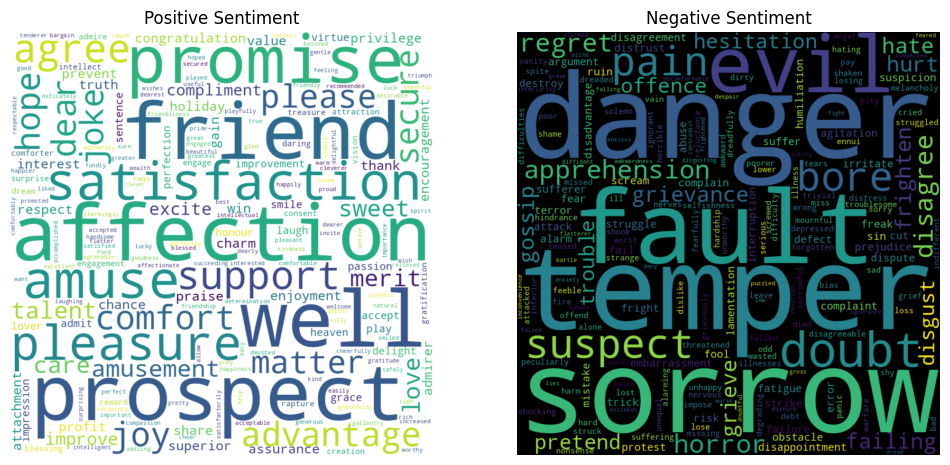

In [61]:
if __name__ == "__main__":
    main()